In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

from collections import Counter

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
from windrose import WindroseAxes
import matplotlib.cm as cm

from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_excel('data/26063.xls',skiprows=6)
df.isna().sum()

Местное время в Санкт-Петербурге       0
T                                      0
Po                                     0
P                                      0
Pa                                    13
U                                      2
DD                                     2
Ff                                     1
ff10                                8593
ff3                                 8012
N                                     25
WW                                     0
W1                                  5729
W2                                  5730
Tn                                  6577
Tx                                  7671
Cl                                  1310
Nh                                  1313
H                                   1274
Cm                                  3658
Ch                                  4895
VV                                     0
Td                                     2
RRR                                 4397
tR              

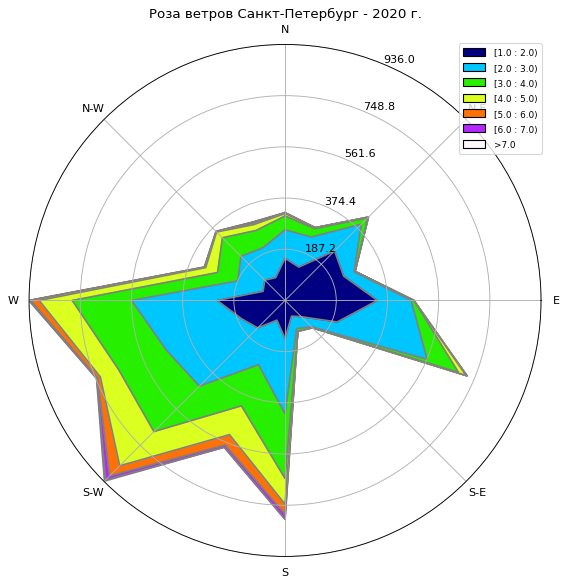

In [3]:
# Creating a dictionary to map Russian wind directions to their corresponding degrees

wind_directions = {
    "Ветер, дующий с юго-юго-запада": 202.5,
    "Ветер, дующий с юго-юго-востока": 157.5,
    "Ветер, дующий с юга": 180,
    "Ветер, дующий с юго-запада": 225,
    "Ветер, дующий с востока": 90,
    "Ветер, дующий с востоко-юго-востока": 112.5,
    "Ветер, дующий с западо-юго-запада": 247.5,
    "Ветер, дующий с юго-востока": 135,
    "Ветер, дующий с западо-северо-запада": 292.5,
    "Ветер, дующий с северо-запада": 315,
    "Ветер, дующий с запада": 270,
    "Штиль, безветрие": None,  # No wind, so no degree
    "Ветер, дующий с востоко-северо-востока": 67.5,
    "Ветер, дующий с северо-востока": 45,
    "Ветер, дующий с северо-северо-востока": 22.5,
    "Ветер, дующий с севера": 0,  # or 360
    "Ветер, дующий с северо-северо-запада": 337.5
}
# Replacing this in data
df.DD.replace(wind_directions, inplace = True)

df.rename({'Местное время в Санкт-Петербурге':'time'}, axis=1, inplace=True)
df['time'] = pd.to_datetime(df['time'])
df.sort_values('time').reset_index(drop=True, inplace=True)
first_year = df.query("'2020-01-01'< time <'2021-01-01'")

wd_26063 = df["DD"]  # Array of wind directions in degrees
ws_26063 = df['Ff']

wd = df["DD"]  # Array of wind directions in degrees
ws = df['Ff']  # Array of wind speeds

ax = WindroseAxes.from_ax()

ax.set_title('Роза ветров Санкт-Петербург - 2020 г.')
ax.contourf(wd, ws, cmap=cm.gist_ncar, bins=np.arange(1, 8, 1))
ax.contour(wd, ws, colors='grey', bins=np.arange(1, 8, 1))
ax.set_legend(loc='upper right')
plt.show()

In [15]:
df = pd.read_excel('data/26002.xls',skiprows=6)
df.isna().sum()

Местное время в Воейково       0
T                             37
Po                             4
P                             29
Pa                          8673
U                             77
DD                             7
Ff                             7
ff10                        8319
ff3                         7685
N                            388
WW                             0
W1                          5300
W2                          5300
Tn                          6519
Tx                          7583
Cl                          1401
Nh                          1383
H                           1075
Cm                          3737
Ch                          4792
VV                             1
Td                            56
RRR                         4372
tR                          4372
E                           8514
Tg                          8522
E'                          8328
sss                         8339
dtype: int64

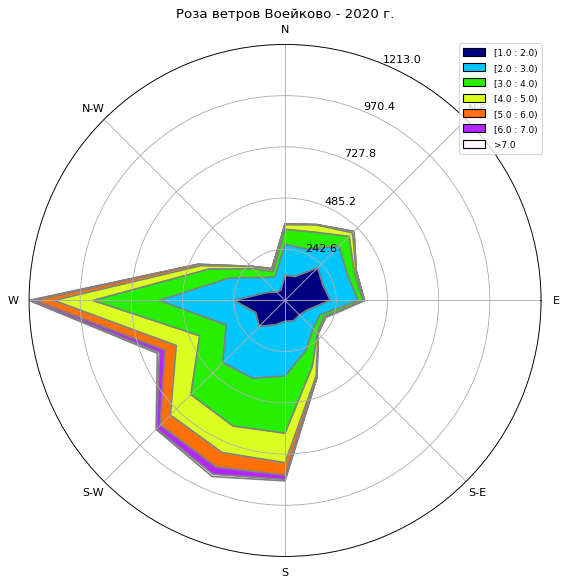

In [16]:
# Creating a dictionary to map Russian wind directions to their corresponding degrees

wind_directions = {
    "Ветер, дующий с юго-юго-запада": 202.5,
    "Ветер, дующий с юго-юго-востока": 157.5,
    "Ветер, дующий с юга": 180,
    "Ветер, дующий с юго-запада": 225,
    "Ветер, дующий с востока": 90,
    "Ветер, дующий с востоко-юго-востока": 112.5,
    "Ветер, дующий с западо-юго-запада": 247.5,
    "Ветер, дующий с юго-востока": 135,
    "Ветер, дующий с западо-северо-запада": 292.5,
    "Ветер, дующий с северо-запада": 315,
    "Ветер, дующий с запада": 270,
    "Штиль, безветрие": None,  # No wind, so no degree
    "Ветер, дующий с востоко-северо-востока": 67.5,
    "Ветер, дующий с северо-востока": 45,
    "Ветер, дующий с северо-северо-востока": 22.5,
    "Ветер, дующий с севера": 0,  # or 360
    "Ветер, дующий с северо-северо-запада": 337.5
}
# Replacing this in data
df.DD.replace(wind_directions, inplace = True)

df.rename({'Местное время в Воейково':'time'}, axis=1, inplace=True)
df['time'] = pd.to_datetime(df['time'])
df.sort_values('time').reset_index(drop=True, inplace=True)
first_year = df.query("'2020-01-01'< time <'2021-01-01'")

wd_26002 = df["DD"]
ws_26002 = df['Ff']

wd = df["DD"]  # Array of wind directions in degrees
ws = df['Ff']  # Array of wind speeds

ax = WindroseAxes.from_ax()

ax.set_title('Роза ветров Воейково - 2020 г.')
ax.contourf(wd, ws, cmap=cm.gist_ncar, bins=np.arange(1, 8, 1))
ax.contour(wd, ws, colors='grey', bins=np.arange(1, 8, 1))
ax.set_legend(loc='upper right')
plt.show()

In [6]:
df = pd.read_excel('data/26059.xls',skiprows=6)
# Creating a dictionary to map Russian wind directions to their corresponding degrees

wind_directions = {
    "Ветер, дующий с юго-юго-запада": 202.5,
    "Ветер, дующий с юго-юго-востока": 157.5,
    "Ветер, дующий с юга": 180,
    "Ветер, дующий с юго-запада": 225,
    "Ветер, дующий с востока": 90,
    "Ветер, дующий с востоко-юго-востока": 112.5,
    "Ветер, дующий с западо-юго-запада": 247.5,
    "Ветер, дующий с юго-востока": 135,
    "Ветер, дующий с западо-северо-запада": 292.5,
    "Ветер, дующий с северо-запада": 315,
    "Ветер, дующий с запада": 270,
    "Штиль, безветрие": None,  # No wind, so no degree
    "Ветер, дующий с востоко-северо-востока": 67.5,
    "Ветер, дующий с северо-востока": 45,
    "Ветер, дующий с северо-северо-востока": 22.5,
    "Ветер, дующий с севера": 0,  # or 360
    "Ветер, дующий с северо-северо-запада": 337.5
}
# Replacing this in data
df.DD.replace(wind_directions, inplace = True)
df.isna().sum()

Местное время в Кингисеппе       0
T                                0
Po                               0
P                                0
Pa                              13
U                               41
DD                             680
Ff                               1
ff10                          8540
ff3                           7993
N                                4
WW                               0
W1                            5421
W2                            5421
Tn                            6576
Tx                            7668
Cl                             829
Nh                             829
H                              825
Cm                            3189
Ch                            4246
VV                               0
Td                              41
RRR                           4384
tR                            4384
E                             8594
Tg                            8594
E'                            8438
sss                 

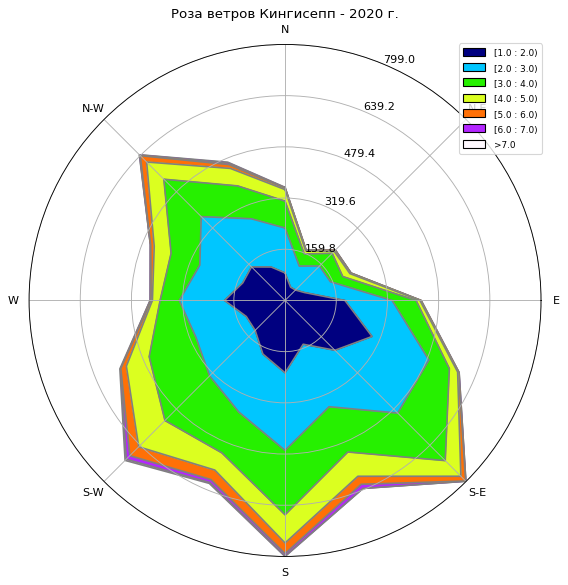

In [13]:
df.rename({'Местное время в Кингисеппе':'time'}, axis=1, inplace=True)
df['time'] = pd.to_datetime(df['time'])
df.sort_values('time').reset_index(drop=True, inplace=True)
first_year = df.query("'2020-01-01'< time <'2021-01-01'")

wd_26059 = df["DD"]
ws_26059 = df['Ff']

wd = df["DD"]  # Array of wind directions in degrees
ws = df['Ff']  # Array of wind speeds

ax = WindroseAxes.from_ax()

ax.contourf(wd, ws, cmap=cm.gist_ncar, bins=np.arange(1, 8, 1))
ax.contour(wd, ws, colors='grey', bins=np.arange(1, 8, 1))
ax.set_legend(loc='upper right')
ax.set_title('Роза ветров Кингисепп - 2020 г.')
plt.show()

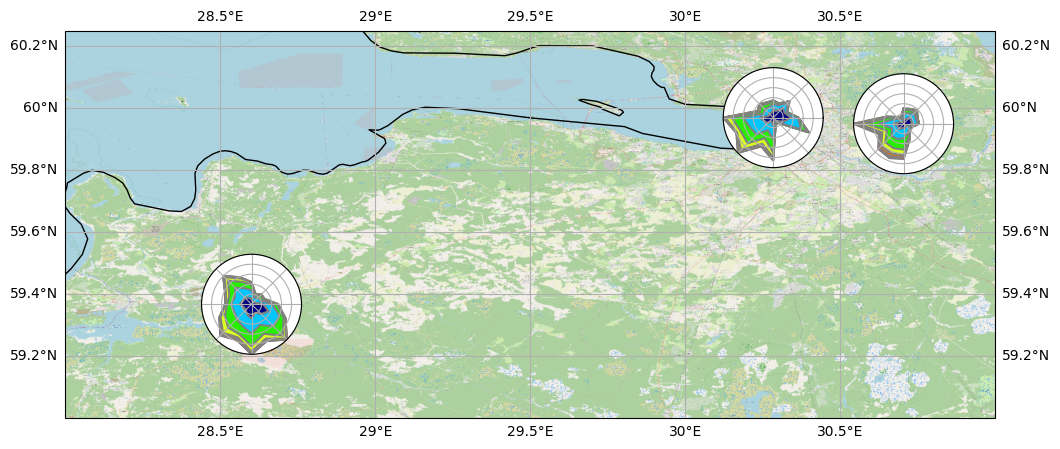

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import windrose

minlon, maxlon, minlat, maxlat = (28, 31, 59, 60.25)

proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(12, 6))
# Draw main ax on top of which we will add windroses
main_ax = fig.add_subplot(1, 1, 1, projection=proj)
main_ax.set_extent([minlon, maxlon, minlat, maxlat], crs=proj)
main_ax.gridlines(draw_labels=True)
main_ax.coastlines()


request = cimgt.OSM()
main_ax.add_image(request, 12)

# Coordinates of the station we were measuring windspeed
lon_26002, lat_26002 = (30.7045, 59.9495)
lon_26063, lat_26063 = (30.2839, 59.9691)
lon_26059, lat_26059 = (28.6011, 59.3671)

wrax_26002 = inset_axes(main_ax,
        width=1,                             # size in inches
        height=1,                            # size in inches
        loc='center',                        # center bbox at given position
        bbox_to_anchor=(lon_26002, lat_26002), # position of the axe
        bbox_transform=main_ax.transData,    # use data coordinate (not axe coordinate)
        axes_class=windrose.WindroseAxes,    # specify the class of the axe
        )

wrax_26063 = inset_axes(main_ax,
        width=1,                             # size in inches
        height=1,                            # size in inches
        loc='center',                        # center bbox at given position
        bbox_to_anchor=(lon_26063, lat_26063), # position of the axe
        bbox_transform=main_ax.transData,    # use data coordinate (not axe coordinate)
        axes_class=windrose.WindroseAxes,    # specify the class of the axe
        )

wrax_26059 = inset_axes(main_ax,
        width=1,                             # size in inches
        height=1,                            # size in inches
        loc='center',                        # center bbox at given position
        bbox_to_anchor=(lon_26059, lat_26059), # position of the axe
        bbox_transform=main_ax.transData,    # use data coordinate (not axe coordinate)
        axes_class=windrose.WindroseAxes,    # specify the class of the axe
        )

# Assume ws_26002, ws_26063, ws_26059 are the wind speed data arrays for the respective locations.
# Assume wd_26002, wd_26063, wd_26059 are the wind direction data arrays for the respective locations.

# Define the bins for wind speed. The last bin will catch all the wind speeds above 7.
speed_bins = np.arange(1, 8, 1)  # 1 to 7 m/s with 1 m/s increments
max_speed = 7  # Define the maximum value for the wind speed that will be represented on the wind roses

# Plot the wind roses
for ax, wd, ws in zip([wrax_26002, wrax_26063, wrax_26059],
                      [wd_26002, wd_26063, wd_26059],
                      [ws_26002, ws_26063, ws_26059]):
    ax.contourf(wd, ws, cmap=cm.gist_ncar, bins=speed_bins, normed=True, nsector=16)
    ax.contour(wd, ws, colors='grey', bins=speed_bins, normed=True, nsector=16)
    # Here, 'normed' ensures the area of each sector is proportional to the frequency.
    # 'nsector' defines the number of sectors (directions) in the wind rose.
    
    # Set the legend - it will use the max frequency across the wind roses to standardize the scale
    
    # Disable the tick labels
    ax.tick_params(labelleft=False, labelbottom=False)

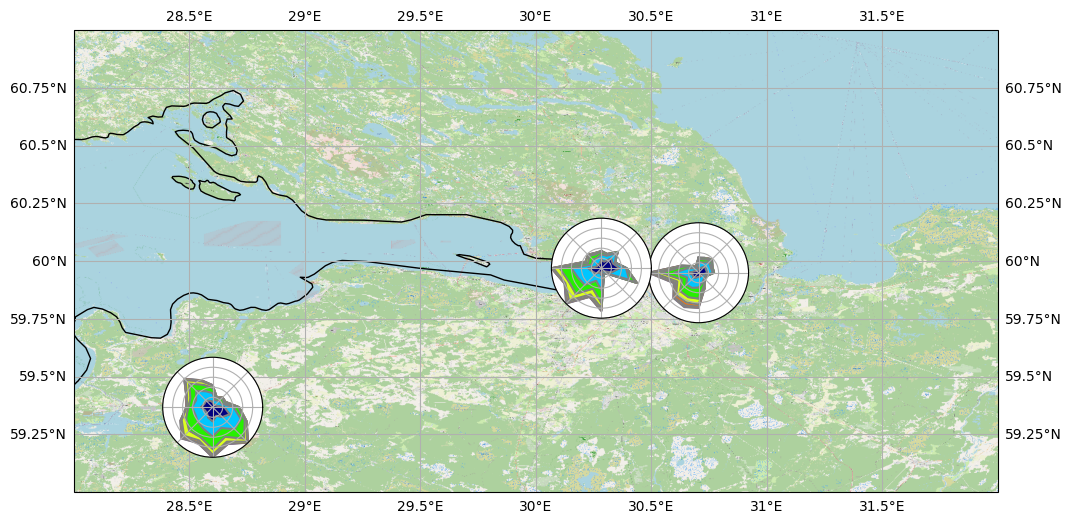

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import windrose

minlon, maxlon, minlat, maxlat = (28, 32, 59, 61)

proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(12, 6))
# Draw main ax on top of which we will add windroses
main_ax = fig.add_subplot(1, 1, 1, projection=proj)
main_ax.set_extent([minlon, maxlon, minlat, maxlat], crs=proj)
main_ax.gridlines(draw_labels=True)
main_ax.coastlines()


request = cimgt.OSM()
main_ax.add_image(request, 12)

# Coordinates of the station we were measuring windspeed
lon_26002, lat_26002 = (30.7045, 59.9495)
lon_26063, lat_26063 = (30.2839, 59.9691)
lon_26059, lat_26059 = (28.6011, 59.3671)

wrax_26002 = inset_axes(main_ax,
        width=1,                             # size in inches
        height=1,                            # size in inches
        loc='center',                        # center bbox at given position
        bbox_to_anchor=(lon_26002, lat_26002), # position of the axe
        bbox_transform=main_ax.transData,    # use data coordinate (not axe coordinate)
        axes_class=windrose.WindroseAxes,    # specify the class of the axe
        )

wrax_26063 = inset_axes(main_ax,
        width=1,                             # size in inches
        height=1,                            # size in inches
        loc='center',                        # center bbox at given position
        bbox_to_anchor=(lon_26063, lat_26063), # position of the axe
        bbox_transform=main_ax.transData,    # use data coordinate (not axe coordinate)
        axes_class=windrose.WindroseAxes,    # specify the class of the axe
        )

wrax_26059 = inset_axes(main_ax,
        width=1,                             # size in inches
        height=1,                            # size in inches
        loc='center',                        # center bbox at given position
        bbox_to_anchor=(lon_26059, lat_26059), # position of the axe
        bbox_transform=main_ax.transData,    # use data coordinate (not axe coordinate)
        axes_class=windrose.WindroseAxes,    # specify the class of the axe
        )

wrax_26002.contourf(wd_26002, ws_26002, cmap=cm.gist_ncar, bins=np.arange(1, 8, 1))
wrax_26002.contour(wd_26002, ws_26002, colors='grey', bins=np.arange(1, 8, 1))

wrax_26063.contourf(wd_26063, ws_26063, cmap=cm.gist_ncar, bins=np.arange(1, 8, 1))
wrax_26063.contour(wd_26063, ws_26063, colors='grey', bins=np.arange(1, 8, 1))

wrax_26059.contourf(wd_26059, ws_26059, cmap=cm.gist_ncar, bins=np.arange(1, 8, 1))
wrax_26059.contour(wd_26059, ws_26059, colors='grey', bins=np.arange(1, 8, 1))
for ax in [wrax_26002, wrax_26063, wrax_26059]:
  ax.tick_params(labelleft=False, labelbottom=False)

In [27]:
df = pd.read_csv('data/26002.csv', skiprows= 6, encoding='UTF-8', on_bad_lines='skip', sep=';', index_col=False)
# Replacing this in data
df.DD.replace(wind_directions, inplace = True)
df.isna().sum()

Местное время в Воейково        0
T                              73
Po                             72
P                             134
Pa                          21085
U                             185
DD                           1776
Ff                             45
ff10                        27741
ff3                         25783
N                             327
WW                              0
W1                          16934
W2                          16934
Tn                          22420
Tx                          24976
Cl                           4580
Nh                           3462
H                            4886
Cm                          11619
Ch                          14000
VV                           2305
Td                            130
RRR                         17878
tR                          17878
E                           28445
Tg                          28467
E'                          27247
sss                         27280
dtype: int64

In [28]:
df = pd.read_csv('data/26063.csv', skiprows= 6, encoding='UTF-8', on_bad_lines='skip', sep=';', index_col=False)
# Replacing this in data
df.DD.replace(wind_directions, inplace = True)
df.isna().sum()

Местное время в Санкт-Петербурге        0
T                                      33
Po                                     25
P                                      46
Pa                                   8994
U                                      71
DD                                   2884
Ff                                     61
ff10                                31431
ff3                                 30083
N                                     136
WW                                      0
W1                                  20510
W2                                  20511
Tn                                  25050
Tx                                  28077
Cl                                   5579
Nh                                   4816
H                                    4672
Cm                                  13006
Ch                                  16697
VV                                     76
Td                                     40
RRR                               

In [29]:
df = pd.read_csv('data/26059.csv', skiprows= 6, encoding='UTF-8', on_bad_lines='skip', sep=';', index_col=False)
# Replacing this in data
df.DD.replace(wind_directions, inplace = True)
df.isna().sum()

Местное время в Кингисеппе        0
T                                23
Po                               20
P                                25
Pa                             8982
U                                70
DD                             2508
Ff                               50
ff10                          31432
ff3                           29327
N                                47
WW                                0
W1                            18248
W2                            18248
Tn                            25056
Tx                            28086
Cl                             4819
Nh                             3493
H                              3463
Cm                            12972
Ch                            16197
VV                               16
Td                               55
RRR                           18978
tR                            18978
E                             31374
Tg                            31454
E'                          

In [30]:
df

,Местное время в Кингисеппе,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,31.12.2020 21:00,1.0,755.5,757.3,0.9,100.0,180.0,2.0,NaN,NaN,...,NaN,NaN,2.0,1.0,0.5,12.0,NaN,NaN,NaN,NaN
1,31.12.2020 18:00,0.9,754.6,756.4,0.6,100.0,157.5,1.0,NaN,NaN,...,NaN,NaN,0.5,0.9,1.0,12.0,NaN,NaN,NaN,NaN
2,31.12.2020 15:00,0.8,754.0,755.9,-0.4,100.0,135.0,1.0,NaN,NaN,...,NaN,NaN,0.5,0.8,NaN,NaN,NaN,NaN,NaN,NaN
3,31.12.2020 12:00,0.6,754.4,756.3,-0.2,100.0,135.0,2.0,NaN,NaN,...,NaN,NaN,10.0,0.6,NaN,NaN,NaN,NaN,NaN,NaN
4,31.12.2020 09:00,0.3,754.6,756.4,-0.7,100.0,112.5,2.0,NaN,NaN,...,Высокослоистые непросвечивающие или слоисто-до...,NaN,4.0,0.3,1.0,12.0,NaN,NaN,Ровный слой слежавшегося или мокрого снега пок...,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32091,01.01.2010 12:00,-12.1,752.1,754.0,NaN,80.0,45.0,2.0,NaN,NaN,...,Высокослоистые просвечивающие.,"Перисто-кучевые одни или перисто-кучевые, сопр...",4.0,-14.8,NaN,NaN,NaN,NaN,NaN,NaN
32092,01.01.2010 09:00,-11.5,751.2,753.1,NaN,80.0,45.0,2.0,NaN,NaN,...,Высокослоистые просвечивающие.,"Перисто-кучевые одни или перисто-кучевые, сопр...",4.0,-14.3,0.5,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,51.0
32093,01.01.2010 06:00,-11.8,750.1,752.0,NaN,85.0,90.0,1.0,NaN,NaN,...,Высокослоистые просвечивающие.,"Перисто-кучевые одни или перисто-кучевые, сопр...",4.0,-13.8,NaN,NaN,NaN,NaN,NaN,NaN
32094,01.01.2010 03:00,-13.1,749.1,751.0,NaN,85.0,NaN,0.0,NaN,NaN,...,Высокослоистые просвечивающие.,"Перисто-кучевые одни или перисто-кучевые, сопр...",4.0,-15.1,NaN,NaN,NaN,NaN,NaN,NaN
